# The Socio-Economic lmpact of EGM Losses on Victoria's Communities

In [66]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Loading Datasets
egm_df = pd.read_csv('data/EGM.csv')
communities_df = pd.read_csv('data/communities.csv')

# Displaying the first few rows of each dataset
print("EGM Dataset:")
display(egm_df.head())

print("Communities Dataset:")
display(communities_df.head())


EGM Dataset:


,LGA Name,Region,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,CITY OF WHITTLESEA,M,1.095429e+08,1.115836e+08,1.010001e+08,1.035006e+08,1.091612e+08,1.116516e+08,1.152932e+08,1.184756e+08,1.207063e+08,91066518.95
1,SHIRE OF NORTHERN GRAMPIANS,C,1.071793e+07,1.121941e+07,1.014142e+07,1.035065e+07,1.003788e+07,9.050693e+06,9.105582e+06,9.720508e+06,9.200584e+06,7004272.36
2,CITY OF GREATER GEELONG,C,1.184686e+08,1.183161e+08,1.097196e+08,1.116281e+08,1.130210e+08,1.132050e+08,1.154188e+08,1.188324e+08,1.203854e+08,89137264.73
3,SHIRE OF COLAC-OTWAY,C,1.105642e+07,1.091608e+07,1.019461e+07,1.007489e+07,1.026330e+07,1.016289e+07,1.023095e+07,1.024279e+07,1.075162e+07,8316806.76
4,SHIRE OF MOORABOOL,C,1.083741e+07,1.116534e+07,1.054645e+07,1.030988e+07,1.057564e+07,1.061337e+07,1.139579e+07,1.196206e+07,1.234074e+07,9631820.68


Communities Dataset:


,Community Name,Region,Map reference,Grid reference,Location,Population Density,Travel time to GPO (minutes),Distance to GPO (km),LGA,Primary Care Partnership,...,Time to nearest public hospital with maternity services,Distance to nearest public hospital with maternity services,"Presentations to emergency departments, 2012-13",Nearest public hospital with emergency department,Travel time to nearest public hospital with emergency department,Distance to nearest public hospital with emergency department,Presentations to emergency departments due to injury,"Presentations to emergency departments due to injury, %",Category 4 & 5 emergency department presentations,"Category 4 & 5 emergency department presentations, %"
0,Abbotsford (Suburb),Northern and Western Metropolitan,4,C3,3km ENE of Melbourne,3082.440714,6.114670,4.264157,Yarra (C),Inner North West Primary Care Partnership,...,6.955606,5.179985,1396.274370,St Vincent's Hospital,4.571875,3.191000,323.83038328,23.192461,885.4447909200001,63.414814
1,Aberfeldie (Suburb),Northern and Western Metropolitan,4,B2,8km NW of Melbourne,2426.665450,13.410363,9.881527,Moonee Valley (C),Inner North West Primary Care Partnership,...,10.540675,7.835355,865.262419,Royal Melbourne Hospital,10.681174,7.916626,177.40004939,20.502456,487.0564898400001,56.290032
2,Aireys Inlet - Fairhaven (Catchment),Barwon-South Western,2,D4,108km SW of Melbourne,0.841522,127.057589,134.213743,Surf Coast (S),G21 Health and Wellbeing Pillar,...,79.950423,58.405921,50.832048,Geelong Hospital,79.950423,58.405921,14.44740341,28.421840,27.98233923,55.048616
3,Aireys Inlet - Fairhaven (Town),Barwon-South Western,2,D4,105km SW of Melbourne,213.059443,97.404694,124.859887,Surf Coast (S),G21 Health and Wellbeing Pillar,...,50.297529,49.052066,155.717114,Geelong Hospital,50.297529,49.052066,44.25766899,28.421840,85.72011677,55.048616
4,Airport West (Catchment),Northern and Western Metropolitan,4,B1,11km NNW of Melbourne,210.819042,13.850488,14.758418,Moonee Valley (C),Inner North West Primary Care Partnership,...,9.705913,10.312795,222.247062,Royal Melbourne Hospital,11.121299,12.793518,39.80414965,17.909865,113.66007,51.141315


In [67]:

# Handling missing values for the EGM dataset
egm_df.isnull().sum()

# Impute or drop missing values (for now, drop rows with missing values)
egm_df = egm_df.dropna()

# Checking for missing values in the Communities dataset
communities_df.isnull().sum()

# Impute missing values for specific columns in Communities dataset if necessary
# Example of filling missing values forward

Community Name                                                    0
Region                                                            0
Map reference                                                     0
Grid reference                                                    0
Location                                                          0
                                                                 ..
Distance to nearest public hospital with emergency department     0
Presentations to emergency departments due to injury              0
Presentations to emergency departments due to injury, %          14
Category 4 & 5 emergency department presentations                 0
Category 4 & 5 emergency department presentations, %              2
Length: 226, dtype: int64

In [68]:
# Handling missing values for the EGM dataset   老师没有做这一步
#egm_df.fillna(method='ffill', inplace=True)

# Handling missing values for the Communities dataset 这里有很多方法，比如ffill，bfill，mean，median，mode等
#communities_df.fillna(method='ffill', inplace=True)

# Check for any remaining missing values
print("Missing values in EGM dataset:")
print(egm_df.isnull().sum())

print("\nMissing values in Communities dataset:")
print(communities_df.isnull().sum())

Missing values in EGM dataset:
LGA Name    0
Region      0
2011        0
2012        0
2013        0
2014        0
2015        0
2016        0
2017        0
2018        0
2019        0
2020        0
dtype: int64

Missing values in Communities dataset:
Community Name                                                    0
Region                                                            0
Map reference                                                     0
Grid reference                                                    0
Location                                                          0
                                                                 ..
Distance to nearest public hospital with emergency department     0
Presentations to emergency departments due to injury              0
Presentations to emergency departments due to injury, %          14
Category 4 & 5 emergency department presentations                 0
Category 4 & 5 emergency department presentations, %              2


In [69]:
egm_df.describe()

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01
mean,4.651523e+07,4.704301e+07,4.369279e+07,4.393585e+07,4.512151e+07,4.590708e+07,4.578123e+07,4.728568e+07,4.734574e+07,3.488054e+07
std,3.782605e+07,3.838832e+07,3.569253e+07,3.587840e+07,3.698697e+07,3.766985e+07,3.736057e+07,3.865332e+07,3.873736e+07,2.835133e+07
min,3.618983e+06,3.280220e+06,2.878671e+06,2.855820e+06,2.818480e+06,2.517170e+06,2.571124e+06,2.457036e+06,2.304602e+06,1.892293e+06
25%,1.268741e+07,1.314689e+07,1.213862e+07,1.264120e+07,1.318433e+07,1.244110e+07,1.276852e+07,1.296820e+07,1.327894e+07,1.022713e+07
50%,3.132567e+07,3.069527e+07,2.902361e+07,2.937604e+07,3.108471e+07,3.142208e+07,3.080120e+07,3.107631e+07,3.026571e+07,2.274725e+07
75%,6.995058e+07,7.128610e+07,7.073998e+07,7.205914e+07,7.336249e+07,7.382234e+07,7.506192e+07,7.586023e+07,7.389007e+07,5.349558e+07
max,1.393851e+08,1.456191e+08,1.376374e+08,1.385427e+08,1.416092e+08,1.430457e+08,1.341417e+08,1.395072e+08,1.429042e+08,1.019742e+08


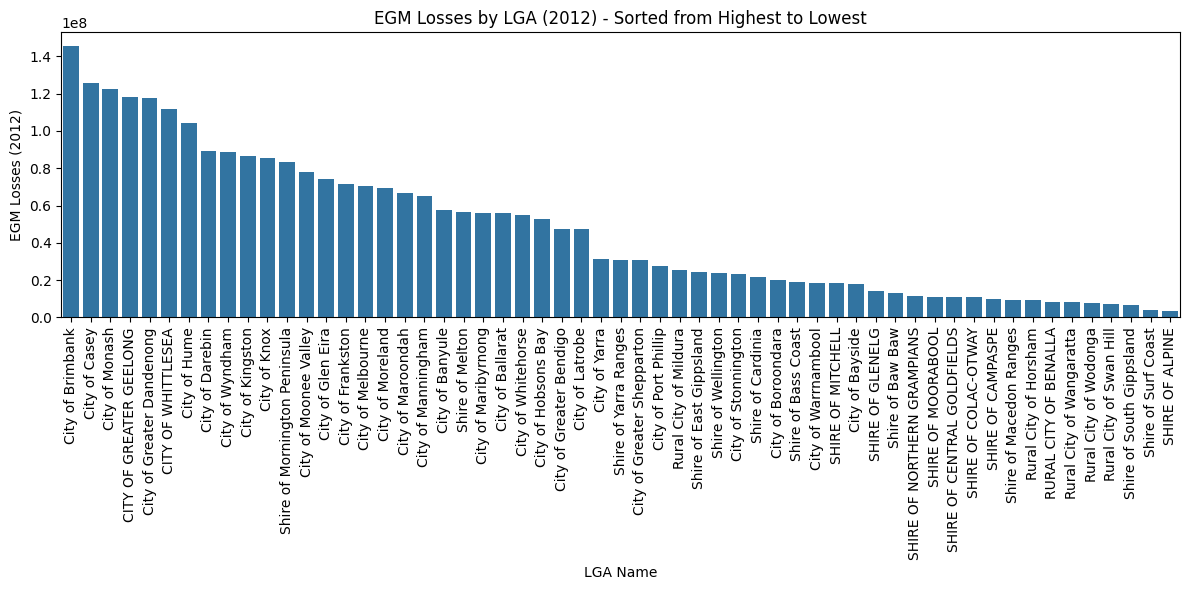

In [70]:
# Visualizing total EGM losses across LGAs
plt.figure(figsize=(12, 6))
# Sort the data by '2012' column in descending order community 只到 2012年的数据
sorted_data = egm_df.sort_values('2012', ascending=False)
sns.barplot(x='LGA Name', y='2012', data=sorted_data)
plt.xticks(rotation=90)
plt.title("EGM Losses by LGA (2012) - Sorted from Highest to Lowest")
plt.xlabel("LGA Name")
plt.ylabel("EGM Losses (2012)")
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

In [71]:
egm_df['LGA Name']

0                CITY OF WHITTLESEA
1       SHIRE OF NORTHERN GRAMPIANS
2           CITY OF GREATER GEELONG
3              SHIRE OF COLAC-OTWAY
4                SHIRE OF MOORABOOL
5       SHIRE OF CENTRAL GOLDFIELDS
6                 SHIRE OF MITCHELL
7                   SHIRE OF ALPINE
8             RURAL CITY OF BENALLA
9                 SHIRE OF CAMPASPE
10                 SHIRE OF GLENELG
11              Shire of Wellington
12            Rural City of Wodonga
13              City of Warrnambool
14          City of Greater Bendigo
15                 City of Ballarat
16          Rural City of Swan Hill
17       City of Greater Shepparton
18            Rural City of Mildura
19          Shire of East Gippsland
20              Shire of Bass Coast
21                  City of Latrobe
22              Shire of Surf Coast
23         Shire of South Gippsland
24          Shire of Macedon Ranges
25            Rural City of Horsham
26                 Shire of Baw Baw
27         Rural City of Wan

In [72]:
# Convert 'LGA Name' to lowercase, split by 'of', and keep the part after 'of', while stripping whitespace
egm_df['LGA Name'] = egm_df['LGA Name'].str.lower().str.split('of').str[-1].str.strip()
egm_df = egm_df[['LGA Name', 'Region', '2012']]
egm_df.head()


,LGA Name,Region,2012
0,whittlesea,M,1.115836e+08
1,northern grampians,C,1.121941e+07
2,greater geelong,C,1.183161e+08
3,colac-otway,C,1.091608e+07
4,moorabool,C,1.116534e+07


In [73]:
communities_df['Region'].head()

0    Northern and Western Metropolitan
1    Northern and Western Metropolitan
2                 Barwon-South Western
3                 Barwon-South Western
4    Northern and Western Metropolitan
Name: Region, dtype: object

In [74]:
# Extract 'Region' and 'LGA' information using regular expression from 'LGA' column
communities_df['Region'] = communities_df['LGA'].str.extract(r'^(.*?)(?:\s*\((.*?)\))?$')[1]
communities_df['LGA'] = communities_df['LGA'].str.extract(r'^(.*?)(?:\s*\((.*?)\))?$')[0]

communities_df[["LGA", "Region"]]

,LGA,Region
0,Yarra,C
1,Moonee Valley,C
2,Surf Coast,S
3,Surf Coast,S
4,Moonee Valley,C
...,...,...
1075,Moira,S
1076,Moira,S
1077,Murrindindi,S
1078,Murrindindi,S


In [75]:
# Convert both columns to lowercase before merging to ignore case sensitivity
egm_df['LGA Name'] = egm_df['LGA Name'].str.lower()
communities_df['LGA'] = communities_df['LGA'].str.lower()

# Merge the two DataFrames on the 'LGA Name' and 'LGA' columns
merged_df = pd.merge(egm_df, communities_df, left_on='LGA Name', right_on='LGA', how='inner')


In [76]:
merged_df

,LGA Name,Region_x,2012,Community Name,Region_y,Map reference,Grid reference,Location,Population Density,Travel time to GPO (minutes),...,Time to nearest public hospital with maternity services,Distance to nearest public hospital with maternity services,"Presentations to emergency departments, 2012-13",Nearest public hospital with emergency department,Travel time to nearest public hospital with emergency department,Distance to nearest public hospital with emergency department,Presentations to emergency departments due to injury,"Presentations to emergency departments due to injury, %",Category 4 & 5 emergency department presentations,"Category 4 & 5 emergency department presentations, %"
0,whittlesea,M,111583555.1,Doreen (Suburb),C,2,C3,28km NE of Melbourne,888.872166,41.407699,...,19.153855,17.384319,3133.196562,The Northern Hospital,19.153855,17.384319,682.21169731,21.773664,1570.9173784999998,50.137850
1,whittlesea,M,111583555.1,Epping (Catchment),C,2,B3,27km N of Melbourne,7.769744,37.883493,...,12.488909,11.139392,229.894816,The Northern Hospital,12.488909,11.139392,50.056525183000005,21.773664,115.264316944,50.137850
2,whittlesea,M,111583555.1,Epping (Suburb),C,2,B4,20km NE of Melbourne,1569.861307,28.799090,...,3.404506,1.921403,9433.686126,The Northern Hospital,3.404506,1.921403,1739.0119496860004,18.434066,4455.574569723,47.230473
3,whittlesea,M,111583555.1,Lalor (Suburb),C,2,B4,17km NE of Melbourne,2247.893115,25.243296,...,4.038055,3.102296,7491.934818,The Northern Hospital,4.038055,3.102296,1305.1293678899997,17.420458,3472.36563161,46.348049
4,whittlesea,M,111583555.1,Mernda (Suburb),C,2,C3,26km NE of Melbourne,1124.876588,35.159013,...,12.657190,12.830803,1852.567168,The Northern Hospital,12.657190,12.830803,403.37175367,21.773664,928.8373393900001,50.137850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,moonee valley,M,77910935.2,Niddrie (Suburb),C,4,A2,11km NW of Melbourne,2865.934470,14.904901,...,7.832135,8.873780,1149.897869,Royal Melbourne Hospital,12.175712,13.575503,221.82976660300005,19.291258,649.1661989700001,56.454248
898,moonee valley,M,77910935.2,Parkville (Catchment),C,4,C3,4km NNW of Melbourne,4272.549621,7.588308,...,4.718620,3.236686,410.684433,Royal Melbourne Hospital,4.859119,3.317957,84.20039648,20.502456,231.17439767000002,56.290032
899,moonee valley,M,77910935.2,Strathmore Heights (Suburb),C,4,B1,13km NNW of Melbourne,1416.500775,16.048712,...,10.054728,9.979023,221.082101,Royal Melbourne Hospital,13.319523,14.896745,42.64951886,19.291258,124.81023836,56.454248
900,moonee valley,M,77910935.2,Strathmore (Suburb),C,4,B2,10km NNW of Melbourne,2453.293075,11.808990,...,8.939302,9.107263,1935.223895,Royal Melbourne Hospital,9.079801,9.188534,388.84886938100004,20.093224,1090.4118942920002,56.345516


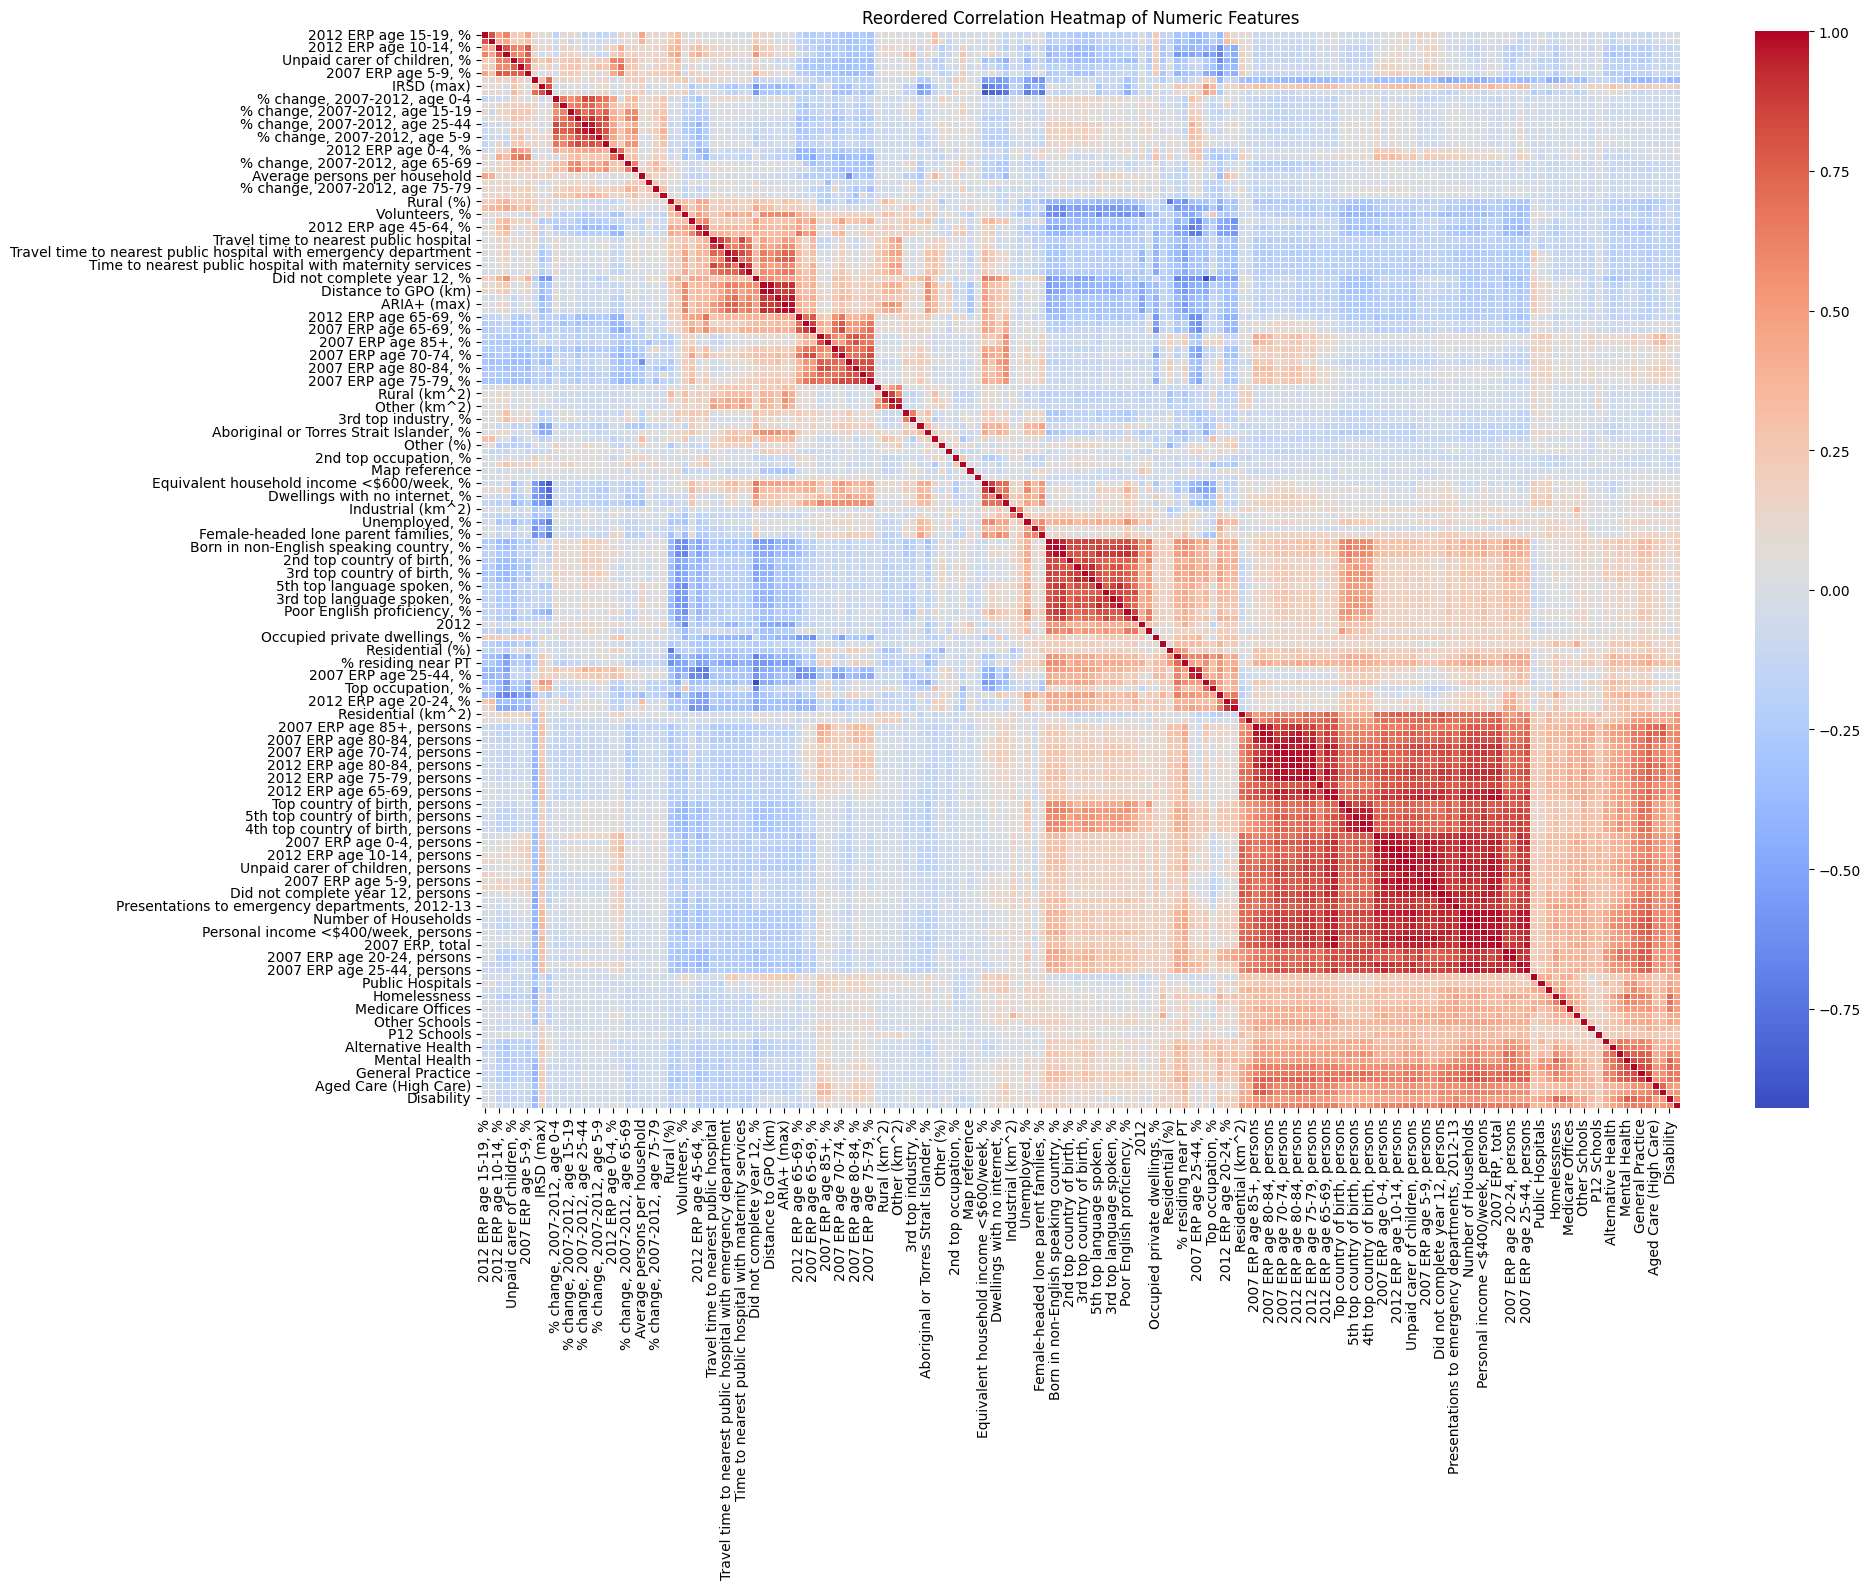

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, leaves_list

# Select only numeric column 这个图跟 cpu 的不一样
numeric_columns = merged_df.select_dtypes(include=[np.number]).columns
numeric_df = merged_df[numeric_columns]

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Perform hierarchical clustering to reorder rows and columns
linkage_matrix = linkage(correlation_matrix, method='ward')

# Get the ordering of the rows and columns from the hierarchical clustering
ordered_idx = leaves_list(linkage_matrix)

# Reorder the correlation matrix
ordered_correlation_matrix = correlation_matrix.iloc[ordered_idx, ordered_idx]

# Create the heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(ordered_correlation_matrix, cmap='coolwarm', annot=False, fmt='.2f', linewidths=0.5)

# Add title
plt.title('Reordered Correlation Heatmap of Numeric Features')

# Rotate x-axis labels
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the heatmap
plt.show()

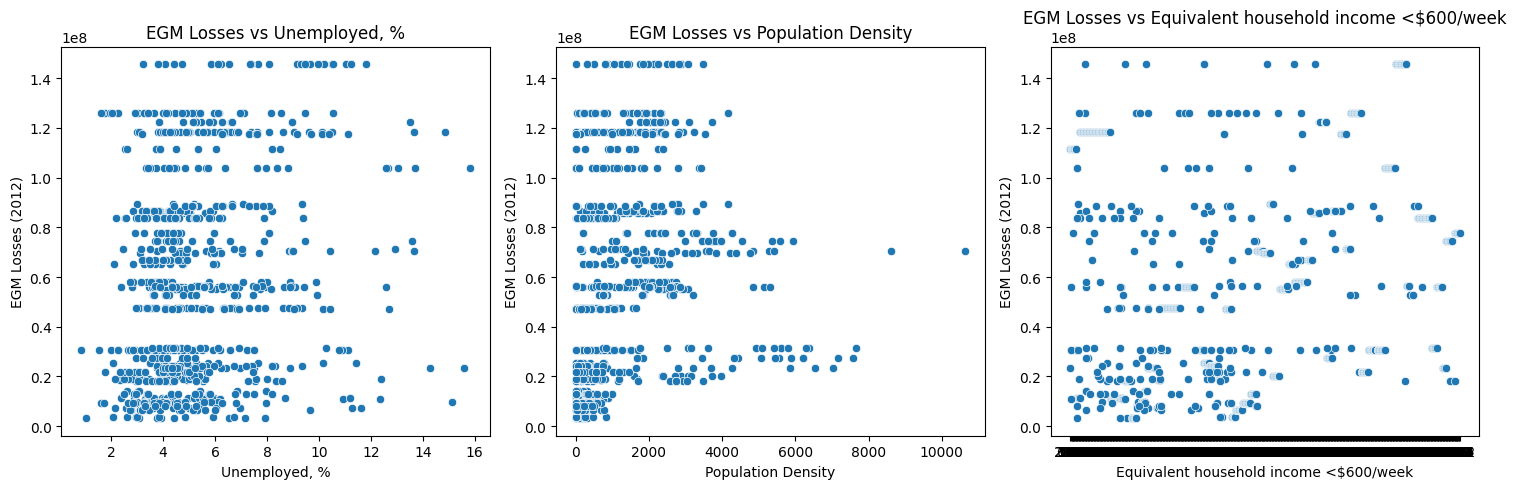

In [78]:
features = ['Unemployed, %', 'Population Density', 'Equivalent household income <$600/week']
merged_df_clean = merged_df[['LGA Name', '2012', 'Unemployed, %', 'Population Density', 'Equivalent household income <$600/week']]

# Step 3: Plot scatter plots for EGM losses against community features
plt.figure(figsize=(15, 5))

for i, feature in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(data=merged_df_clean, x=feature, y='2012')
    plt.title(f'EGM Losses vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('EGM Losses (2012)')

plt.tight_layout()
plt.show()


In [79]:
correlation_data = merged_df_clean.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap between EGM Losses and Community Features (2012)')
plt.show()


ValueError: could not convert string to float: 'whittlesea'

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Remove rows with NaN values
merged_df_clean = merged_df.dropna()

# Prepare features (X) and target (y)
X = merged_df_clean.drop(columns=['2012'])  # Exclude the target column (EGM losses in 2012)
y = merged_df_clean['2012']  # Target variable (EGM losses in 2012)

# Perform Label Encoding on categorical variables
X_encoded = X.copy()

# Apply LabelEncoder to all object-type columns
for col in X_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])

# Apply StandardScaler to normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Full Model with Linear Regression (for comparison)
lr_full = LinearRegression()
lr_full.fit(X_train, y_train)
y_pred_full = lr_full.predict(X_test)
mse_full = mean_squared_error(y_test, y_pred_full)
r2_full = r2_score(y_test, y_pred_full)

print("Linear Regression Model Performance (with normalization):")
print(f"Mean Squared Error: {mse_full}")
print(f"R^2 Score: {r2_full}\n")


Linear Regression Model Performance (with normalization):
Mean Squared Error: 1291894627718652.5
R^2 Score: 0.029595258691157866




Feature Importance (Sorted by P-Value):
                                     Feature       Score       P-Value
151                            Volunteers, %  169.698602  3.223117e-31
179                   Speaks LOTE at home, %   89.509295  8.073163e-19
177  Born in non-English speaking country, %   88.888710  1.029807e-18
175                         Born overseas, %   76.187132  1.641761e-16
211               5th top language spoken, %   64.575028  1.983951e-14
..                                       ...         ...           ...
161                          Top industry, %    0.000810  9.773171e-01
168             2nd top occupation - persons    0.000611  9.802932e-01
143                      University students    0.000129  9.909437e-01
121                 Public Housing Dwellings    0.000030  9.956102e-01
69                     2007 ERP age 65-69, %    0.000021  9.963725e-01

[228 rows x 3 columns]

Selected Features (P-Value < 0.05):
                                     Feature  

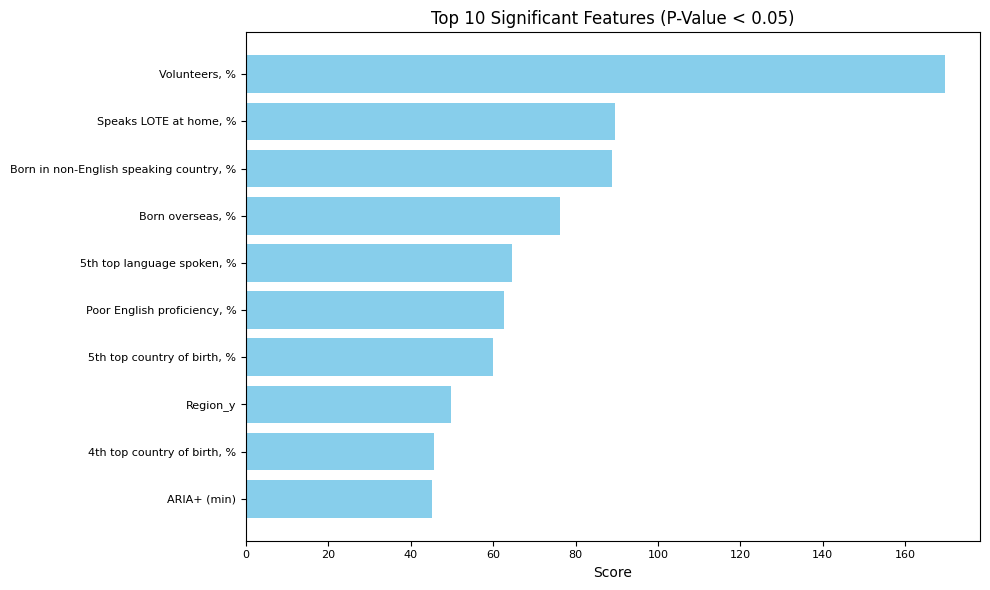

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt

# Use SelectKBest with f_regression to select the most significant features
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X_train, y_train)

# Get the p-values and scores for each feature
p_values = selector.pvalues_
scores = selector.scores_

# Create a DataFrame to view feature importance
feature_importance = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Score': scores,
    'P-Value': p_values
})

# Sort by the most significant (lowest p-value)
significant_features = feature_importance.sort_values(by='P-Value')

# Define a p-value threshold to select significant features
p_value_threshold = 0.05
selected_features = significant_features[significant_features['P-Value'] < p_value_threshold]

print("\nFeature Importance (Sorted by P-Value):")
print(significant_features)
print(f"\nSelected Features (P-Value < {p_value_threshold}):")
print(selected_features)

# Select the top features based on p-value threshold
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Select top 10 significant features
top_10_features = selected_features.head(10)

# Visualize the top 10 feature importance with smaller font size
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Score'], color='skyblue')
plt.xlabel('Score', fontsize=10)  # Smaller font size for x-axis label
plt.title('Top 10 Significant Features (P-Value < 0.05)', fontsize=12)  # Smaller font size for title
plt.gca().invert_yaxis()  # To display the highest scores on top

# Adjust tick parameters for smaller font size on both axes
plt.tick_params(axis='both', which='major', labelsize=8)

plt.tight_layout()
plt.show()


In [ ]:
### Model After Feature Selection
# Initialize and train the linear regression model on selected features
lr_selected = LinearRegression()
lr_selected.fit(X_train_selected, y_train)

# Predict and evaluate the model
y_pred_selected = lr_selected.predict(X_test_selected)
mse_selected = mean_squared_error(y_test, y_pred_selected)
r2_selected = r2_score(y_test, y_pred_selected)

print("\nModel After Feature Selection:")
print(f"Mean Squared Error: {mse_selected}")
print(f"R^2 Score: {r2_selected}")

# Compare performance before and after feature selection
print("\nPerformance Comparison:")
print(f"Full Model - MSE: {mse_full}, R^2: {r2_full}")
print(f"Selected Features Model - MSE: {mse_selected}, R^2: {r2_selected}")



Model After Feature Selection:
Mean Squared Error: 1291894627718652.0
R^2 Score: 0.0295952586911582

Performance Comparison:
Full Model - MSE: 1291894627718652.5, R^2: 0.029595258691157866
Selected Features Model - MSE: 1291894627718652.0, R^2: 0.0295952586911582


In [ ]:
### Random Forest Regression Model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict and evaluate the Random Forest model
y_pred_rf = rf_regressor.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Model Performance (with normalization):")
print(f"Mean Squared Error: {mse_rf}")
print(f"R^2 Score: {r2_rf}")


Random Forest Regression Model Performance (with normalization):
Mean Squared Error: 308643556118435.9
R^2 Score: 0.7681628487296577
